In [1]:
from shapely import LineString, Point
import geopandas as gpd
import pandas as pd
import moveminer
import warnings
warnings.filterwarnings("ignore")

In [2]:
test = pd.read_csv('./datasets/test.csv')
df = test[test['id'] == test['id'].unique()[0]]

In [3]:
traj = moveminer.Trajectory(df=df, x='x', y='y', t='datetime', uid='id')

### Spacial Query

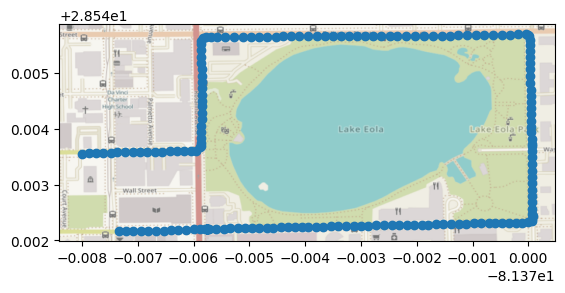

In [4]:
moveminer.visualization.image.plot(traj)

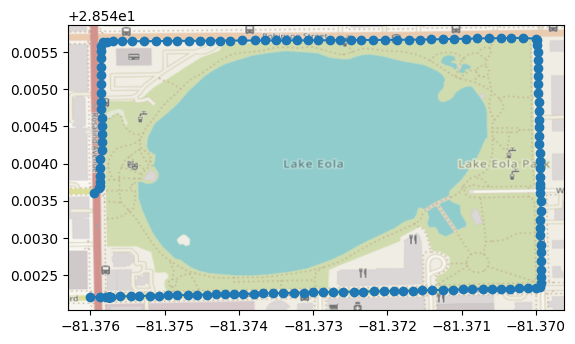

In [5]:
query = moveminer.spacial_query(traj, -81.376006,  28.542165, -81.369924,  28.545695)
moveminer.visualization.image.plot(query)

### Temporal Query

In [6]:
start = '2023-11-15 18:14:26.725897'
end = '2023-11-15 18:14:49.725897' 
query = moveminer.temporal_query(traj, start, end)

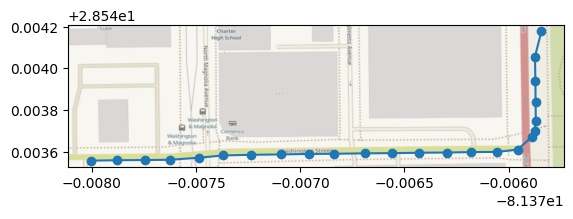

In [7]:
moveminer.visualization.image.plot(query)

### KNN Query

In [8]:
geo = LineString([
    Point(-81.37538454278695, 28.544885825638552),
    Point(-81.37535419684313, 28.54517238822342),
    Point(-81.37510763683406, 28.54527901583028),
])
geo_gdf = gpd.GeoDataFrame(geometry=[
    Point(-81.37538454278695, 28.544885825638552),
    Point(-81.37535419684313, 28.54517238822342),
    Point(-81.37510763683406, 28.54527901583028),
], crs='EPSG:4326')

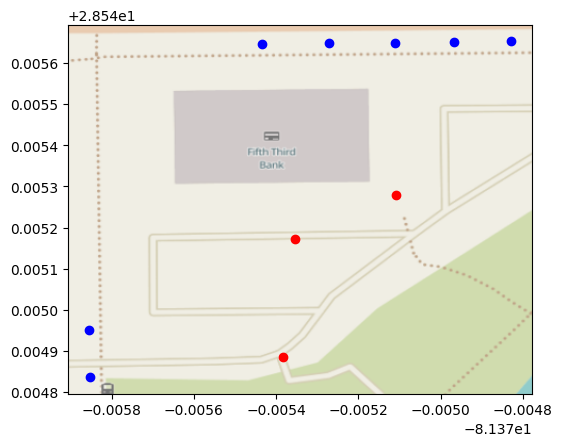

In [9]:
query = moveminer.knn_query(traj, 7, geo)
ax = geo_gdf.plot(color='red')
ax = query.gdf.plot(ax=ax, color='blue')
moveminer.image.plot(query, ax=ax)

### Similarity Query

In [89]:
df1 = test[test['id'] == test['id'].unique()[1]]
df2 = test[test['id'] == test['id'].unique()[10]]
df3 = test[test['id'] == test['id'].unique()[11]]
df4 = test[test['id'] == test['id'].unique()[12]]
t0 = moveminer.Trajectory(df=df1, x='x', y='y', t='datetime', uid='id')
t1 = moveminer.Trajectory(df=df2, x='x', y='y', t='datetime', uid='id')
t2 = moveminer.Trajectory(df=df3, x='x', y='y', t='datetime', uid='id')
t3 = moveminer.Trajectory(df=df4, x='x', y='y', t='datetime', uid='id')
ts = [t1, t2, t3]

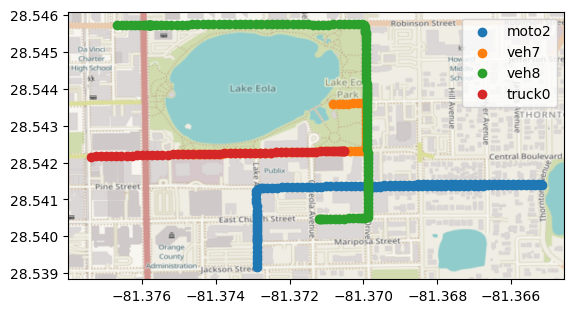

In [93]:
moveminer.visualization.image.plot([*ts, t0])

In [94]:
query = moveminer.similarity_query(t0, ts)

[0. 0.]
[0. 0.]
[0. 0.]


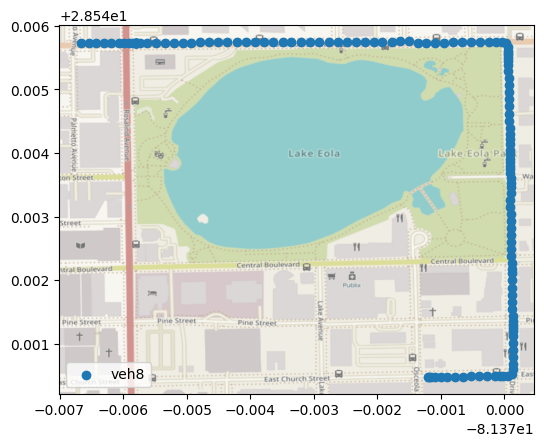

In [95]:
moveminer.visualization.image.plot([query])